# Predict The Cost of Used Cars 

<h3> Made by B.Hariharan </h3>

## Data Analysis

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

warnings.filterwarnings('ignore')

In [0]:
train_model = pd.read_excel('Data_Train.xlsx')
test_model = pd.read_excel('Data_Test.xlsx')

In [0]:
data = pd.concat([train_model, test_model], sort = False) 
# In some future analysis, we use this concatenated dataset for better accuracy

In [0]:
train_model.shape

(6019, 12)

In [0]:
test_model.shape

(1234, 11)

In [0]:
train_model.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [0]:
test_model.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [0]:
train_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [0]:
train_model.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [0]:
train_model.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

## Data Cleaning

<li>Categorical Features - Name, Location, Fuel_Type, Transmission, Owner_Type</li>
<li>Continous Features - Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price</li>


In [0]:
categorical_features = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [0]:
train_model[categorical_features].nunique()

Name            1876
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
dtype: int64

In [0]:
test_model[categorical_features].nunique()

Name            768
Location         11
Fuel_Type         4
Transmission      2
Owner_Type        4
dtype: int64

<p>Clearly there is some Name and Fuel Type values that are only in training but not in testing data.</p>
<p>We have to remove these redundant data.</p>

In [0]:
# We abstract only the name of the brand for our calculations
train_model['Name'] = train_model.Name.str.split().str.get(0) 
test_model['Name'] = test_model.Name.str.split().str.get(0)

In [0]:
train_model.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [0]:
test_model.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [0]:
# Redundant Brand Names
train_names = list(train_model.Name.str.split(' ').str[0].unique())
test_names = list(test_model.Name.str.split(' ').str[0].unique())
not_in = [item for item in train_names if item not in test_names]
not_in

['Smart', 'Ambassador', 'Force', 'Lamborghini']

In [0]:
#Removing brands in the training set but not in testing set
train_model = train_model[~train_model.Name.str.contains('|'.join(not_in))]

In [0]:
train_model[categorical_features]['Name'].nunique()

27

In [0]:
# Similarly for fuel type
list(train_model.Fuel_Type[~train_model.Fuel_Type.isin(test_model.Fuel_Type)].unique())

['Electric']

In [0]:
train_model = train_model[train_model.Fuel_Type != 'Electric']

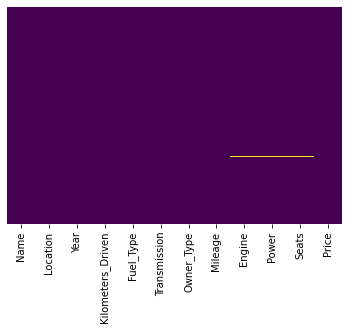

In [0]:
# Find which columns have missing data
sns.heatmap(train_model.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

<p>Engine, Power and Seats have mssing data<p>
<p>So we try to replace these NaN and 0 values with the mean / most commonly occuring value<p>

In [0]:
data['Seats'].value_counts().argmax()
# The frequency is calculated with the value_counts function and its highest value is chosen using argmax.

0

In [0]:
train_model['Seats'] = train_model['Seats'].fillna(5)
test_model['Seats'] = test_model['Seats'].fillna(5)

In [0]:
train_model.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [0]:
data['Engine'].value_counts()

1197 CC    732
1248 CC    610
1498 CC    370
998 CC     309
1198 CC    281
          ... 
1468 CC      1
1389 CC      1
970 CC       1
2000 CC      1
1422 CC      1
Name: Engine, Length: 150, dtype: int64

In [0]:
train_model['Engine'] = train_model['Engine'].fillna('1197 CC')
test_model['Engine'] = test_model['Engine'].fillna('1197 CC')

In [0]:
data['Power'].value_counts()

74 bhp       280
98.6 bhp     166
73.9 bhp     152
140 bhp      142
null bhp     129
            ... 
156 bhp        1
71.01 bhp      1
41 bhp         1
382 bhp        1
68.1 bhp       1
Name: Power, Length: 386, dtype: int64

In [0]:
train_model['Power'] = train_model['Power'].fillna('74 bhp')
test_model['Power'] = test_model['Power'].fillna('74 bhp')

train_model['Power'] = train_model['Power'].replace("null bhp", "74 bhp")
test_model['Power'] = test_model['Power'].replace("null bhp", "74 bhp")

In [0]:
data['Mileage'].value_counts()

17.0 kmpl     207
18.9 kmpl     201
18.6 kmpl     144
21.1 kmpl     106
20.36 kmpl    105
             ... 
14.57 kmpl      1
12.95 kmpl      1
20.62 kmpl      1
19.91 kmpl      1
16.12 kmpl      1
Name: Mileage, Length: 450, dtype: int64

In [0]:
train_model['Mileage'] = train_model['Mileage'].fillna('17.0 kmpl')
test_model['Mileage'] = test_model['Mileage'].fillna('17.0 kmpl')

train_model['Mileage'] = train_model['Mileage'].replace("0.0 kmpl", "17.0 kmpl")
test_model['Mileage'] = test_model['Mileage'].replace("0.0 kmpl", "17.0 kmpl")

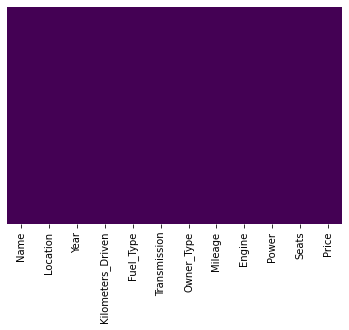

In [0]:
sns.heatmap(train_model.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

* We have successfully replaced all the NaN and the 0 values in this dataset

In [0]:
train_model.isnull().sum() # Double Checking

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

## Data Visualization

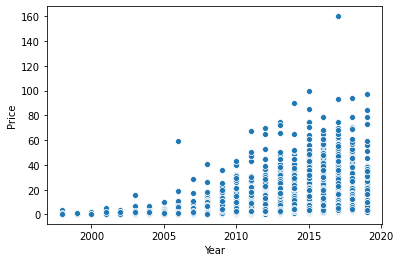

In [0]:
ax=sns.scatterplot(x="Year", y="Price", data=train_model)

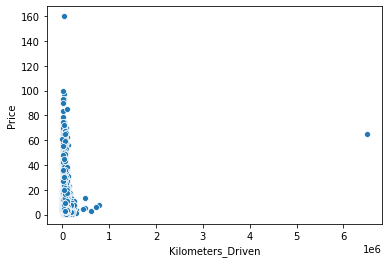

In [0]:
ax=sns.scatterplot(x="Kilometers_Driven", y="Price", data=train_model)

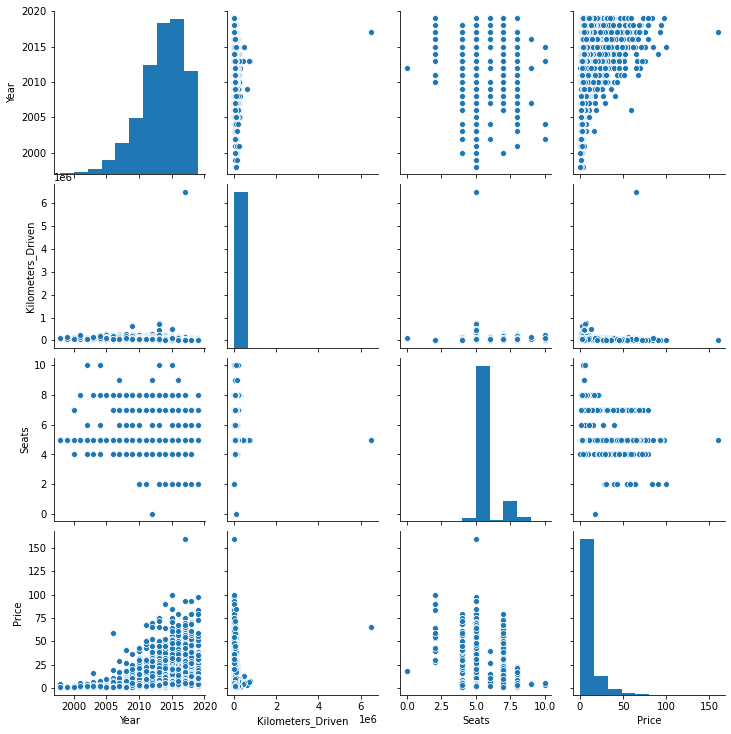

In [0]:
col = train_model.columns
sns.pairplot( train_model[col],height = 2.5)

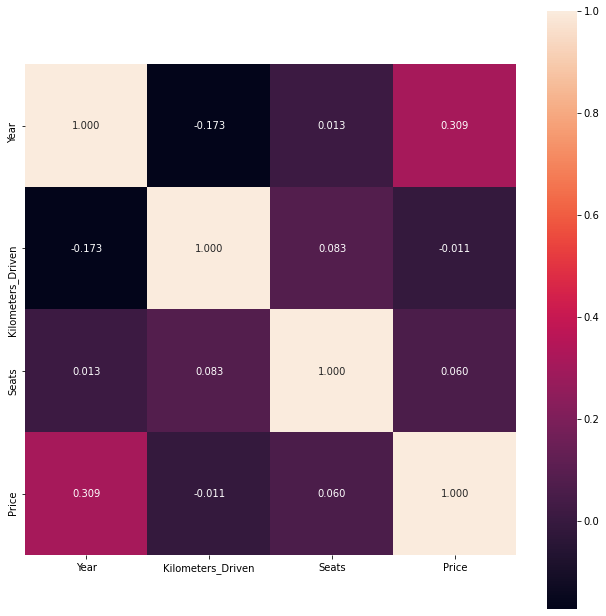

In [0]:
plt.subplots(figsize = (11,11))
corrmatrix = train_model.corr()
sns.heatmap(corrmatrix ,square = True,annot = True , fmt = '.3f')

In [0]:
corrmatrix

,Year,Kilometers_Driven,Seats,Price
Year,1.000000,-0.173072,0.013293,0.308881
Kilometers_Driven,-0.173072,1.000000,0.083225,-0.010558
Seats,0.013293,0.083225,1.000000,0.059824
Price,0.308881,-0.010558,0.059824,1.000000


In [0]:
# Now we have to convert all values in all columns into numeric format by using regex
def get_number(name):
    title_search = re.search('([\d+\.+\d]+\W)', str(name))
    
    if title_search:
        return title_search.group(1)
    return ""

In [0]:
train_model.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [0]:
# Removing the unnecessary units and rounding off the float
train_model.Mileage = train_model.Mileage.apply(lambda x: str(x).split()[0]).astype(float).round(2)
train_model.Engine = train_model.Engine.apply(lambda x: str(x).split()[0]).astype(float) 
train_model.Power = train_model.Power.apply(lambda x: str(x).split()[0]).astype(float).round(2)

test_model.Mileage = test_model.Mileage.apply(lambda x: str(x).split()[0]).astype(float).round(2)
test_model.Engine = test_model.Engine.apply(lambda x: str(x).split()[0]).astype(float)
test_model.Power = test_model.Power.apply(lambda x: str(x).split()[0]).astype(float).round(2)

In [0]:
train_model.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [0]:
test_model.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,74.00,5.0
4,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


## Encoding and Train_Test_Split

<p>Now we have to convert the Categorical variables (Fuel_Type, Transmission, Owner_Type) into 
numerical values so that our algorithm can work</p>

In [0]:
from sklearn.model_selection import train_test_split
X = train_model.drop(['Price'],axis=1)
y = np.log1p(train_model.Price) 
# Calculating natural log gave a better result for reducing the error values

In [0]:
print(X)

           Name    Location  Year  ...  Engine   Power Seats
0        Maruti      Mumbai  2010  ...   998.0   58.16   5.0
1       Hyundai        Pune  2015  ...  1582.0  126.20   5.0
2         Honda     Chennai  2011  ...  1199.0   88.70   5.0
3        Maruti     Chennai  2012  ...  1248.0   88.76   7.0
4          Audi  Coimbatore  2013  ...  1968.0  140.80   5.0
...         ...         ...   ...  ...     ...     ...   ...
6014     Maruti       Delhi  2014  ...  1248.0   74.00   5.0
6015    Hyundai      Jaipur  2015  ...  1120.0   71.00   5.0
6016   Mahindra      Jaipur  2012  ...  2498.0  112.00   8.0
6017     Maruti     Kolkata  2013  ...   998.0   67.10   5.0
6018  Chevrolet   Hyderabad  2011  ...   936.0   57.60   5.0

[6011 rows x 11 columns]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=0)
# I had to choose 0.7 and 0.3 because anything lower than that was creating problems for the 'Bentley' brand.
# 0.7 and 0.3 is the sweet spot.

In [0]:
from sklearn.preprocessing import LabelEncoder
# Label Encoder is used to convert the categorical features into a format that can be sent as input to the ML model

In [0]:
label_encoder = LabelEncoder()

X_train['Name'] = label_encoder.fit_transform(X_train['Name'])
X_test['Name'] = label_encoder.transform(X_test['Name'])
test_model['Name'] = test_model['Name'].map(lambda s: '<unknown>' if s not in label_encoder.classes_ else s)
label_encoder.classes_ = np.append(label_encoder.classes_, '<unknown>')
test_model['Name'] = label_encoder.transform(test_model['Name'])

X_train['Fuel_Type'] = label_encoder.fit_transform(X_train['Fuel_Type'])
X_test['Fuel_Type'] = label_encoder.transform(X_test['Fuel_Type'])
test_model['Fuel_Type'] = test_model['Fuel_Type'].map(lambda s: '<unknown>' if s not in label_encoder.classes_ else s)
label_encoder.classes_ = np.append(label_encoder.classes_, '<unknown>')
test_model['Fuel_Type'] = label_encoder.transform(test_model['Fuel_Type'])

X_train['Transmission'] = label_encoder.fit_transform(X_train['Transmission'])
X_test['Transmission'] = label_encoder.transform(X_test['Transmission'])
test_model['Transmission'] = test_model['Transmission'].map(lambda s: '<unknown>' if s not in label_encoder.classes_ else s)
label_encoder.classes_ = np.append(label_encoder.classes_, '<unknown>')
test_model['Transmission'] = label_encoder.transform(test_model['Transmission'])

X_train['Owner_Type'] = label_encoder.fit_transform(X_train['Owner_Type'])
X_test['Owner_Type'] = label_encoder.transform(X_test['Owner_Type'])
test_model['Owner_Type'] = test_model['Owner_Type'].map(lambda s: '<unknown>' if s not in label_encoder.classes_ else s)
label_encoder.classes_ = np.append(label_encoder.classes_, '<unknown>')
test_model['Owner_Type'] = label_encoder.transform(test_model['Owner_Type'])

In [0]:
X_train['Location'] = X_train['Location'].astype('category')
X_train= pd.get_dummies(X_train, sparse=False, dtype='int64')
X_test['Location'] = X_test['Location'].astype('category')
X_test= pd.get_dummies(X_test, sparse=False, dtype='int64')
test_model['Location'] = test_model['Location'].astype('category')
test_model= pd.get_dummies(test_model, sparse=False, dtype='int64')

In [0]:
# We do this to escape dummy trap
X_train = X_train.drop(columns='Location_Pune')
X_test = X_test.drop(columns='Location_Pune')
test_model = test_model.drop(columns='Location_Pune')

In [0]:
X_train.head()

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai
4281,21,2017,4700,3,1,0,25.17,799.0,53.3,5.0,0,0,0,0,0,0,0,0,0,0
2918,24,2014,55960,1,1,0,11.50,2982.0,171.0,7.0,0,0,0,0,0,0,0,0,0,0
4737,6,2017,38681,1,1,0,13.50,2198.0,157.7,7.0,0,0,0,0,0,0,0,1,0,0
1700,8,2011,108242,1,1,0,16.80,1493.0,110.0,5.0,0,0,1,0,0,0,0,0,0,0
977,3,2012,65000,1,1,0,25.44,936.0,57.6,5.0,0,1,0,0,0,0,0,0,0,0


## Training the model using XGBRegressor

<p>I found out that this gradient boosting algo was <em><strong>better and faster</strong></em> than other models like regression or SVM </p>
<ul>
<li>If the learning rate is higher, the algorithm overshoots the global minima, and we get highly inaccurate results.</li>
<li>If learning rate is lesser, the computation time becomes high. </li>
<p>Finally we fit the training data into the gradient boost model and the calculate predictions for the testing data</p>

In [0]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error
final_model = XGBRegressor(n_estimators=100000, learning_rate=0.20)
final_model.fit(X_train, y_train, 
             early_stopping_rounds=100, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

predictions = final_model.predict(X_test)
from sklearn.metrics import r2_score
r2score=r2_score(y_test, predictions)
print("R2-Score:",r2score)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))
print("Mean Squared Error : " + str(mean_squared_error(predictions, y_test)))
print("Mean Squared Log Error : " + str(mean_squared_log_error(predictions, y_test)))

[08:56:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2-Score: 0.9532360684141954
Mean Absolute Error: 0.10444706252532286
Mean Squared Error : 0.02619299512953051
Mean Squared Log Error : 0.0029836494177368235


In [0]:
# For the sake of variety, we add models like Multiple Linear Regression and Random Forest
# Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
r2score=r2_score(y_train, regressor.predict(X_train))
print("R2-Score:",r2score)

R2-Score: 0.875202884675625


In [0]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2score=r2_score(y_test, y_pred)
print("R2-Score:",r2score)

R2-Score: 0.8682486880360473


In [0]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_train_pred=rf.predict(X_train)
y_pred = rf.predict(X_test)

In [0]:
r2score=r2_score(y_train, y_train_pred)
print("R2-Score:",r2score)
r2score=r2_score(y_test, y_pred)
print("R2-Score:",r2score)
print(y_pred)

R2-Score: 0.990474549526051
R2-Score: 0.9342333172560858
[1.88720684 0.98240417 1.92074808 ... 2.115903   2.16205073 2.57797146]


## Predicting the outupt for Data_Test.xlsx

In [0]:
predict = final_model.predict(test_model) # Result of XGBRegressor
print(predict)

[1.49292   1.4201283 2.828309  ... 1.3835858 1.9343555 3.0196335]


In [0]:
df = pd.DataFrame(np.array(predict))
filepath = 'Output_File.xlsx'

df.to_excel(filepath, index=False)

Output us stored in "Output_File.xlsx" excel file.

In [0]:
from google.colab import files

files.download('Output_File.xlsx')